# OncodriveCLUSTL testing 

Variables:
(GENES_x_y_smoothw_clusterw_clusterscore_genescore) 
- *x*: int, minimum number of mutations within a gene
- *y*: int, minimum number of mutations within a cluster
- *smoothw*: smoothing window
- *clusterw*: cluster window
- *clsuterscore*: three methods evaluated {nmutations, genelength, nobias}. Variations from the original scoring formula of oncodriveCLUST. 
- *genescore*: three methods evaluated {sum, mean, wmean}. Sum == sum of scores of clusters. Mean == mean of scores of clusters. Wmean = mean of score of cluster / length cluster of clusters within a region. 

##### Conclusion
We choose GENES_2_2_50_50_nobias_mean for downstream analysis

In [1]:
import ipywidgets as widgets
from ipywidgets import interact
from bokeh.io import output_notebook

from bgplots.bio.enrichment import create_table

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
%matplotlib notebook

In [4]:
from bgplots.matplotlib import enrichment as mpl_enrichment
from bgplots.bokeh import enrichment as bkh_enrichment

/home/carnedo/anaconda3/envs/bgplots/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)


#### Read CGC genes

In [5]:
CGC = set([line.split('\t')[0] for line in open('/home/carnedo/projects/oncodriveclustl/inputs/CGC/CGCMay17_cancer_types_TCGA.tsv', 'r')])

#### Load data

In [6]:
GENES_2_1_50_50_genelength_sum = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_1_50_50_genelength_sum.tab', 'r')]
GENES_2_1_50_50_genelength_mean = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_1_50_50_genelength_mean.tab', 'r')]
GENES_2_1_50_50_genelength_wmean = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_1_50_50_genelength_wmean.tab', 'r')]
GENES_2_2_50_50_genelength_sum = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_2_50_50_genelength_sum.tab', 'r')]
GENES_2_2_50_50_genelength_mean = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_2_50_50_genelength_mean.tab', 'r')]
GENES_2_2_50_50_genelength_wmean = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_2_50_50_genelength_wmean.tab', 'r')]

GENES_2_1_50_50_nmutations_sum = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_1_50_50_nmutations_sum.tab', 'r')]
GENES_2_1_50_50_nmutations_mean = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_1_50_50_nmutations_mean.tab', 'r')]
GENES_2_1_50_50_nmutations_wmean = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_1_50_50_nmutations_wmean.tab', 'r')]
GENES_2_2_50_50_nmutations_sum = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_2_50_50_nmutations_sum.tab', 'r')]
GENES_2_2_50_50_nmutations_mean = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_2_50_50_nmutations_mean.tab', 'r')]
GENES_2_2_50_50_nmutations_wmean = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_2_50_50_nmutations_wmean.tab', 'r')]

GENES_2_1_50_50_nobias_sum = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_1_50_50_nobias_sum.tab', 'r')]
GENES_2_1_50_50_nobias_mean = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_1_50_50_nobias_mean.tab', 'r')]
GENES_2_1_50_50_nobias_wmean = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_1_50_50_nobias_wmean.tab', 'r')]
GENES_2_2_50_50_nobias_sum = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_2_50_50_nobias_sum.tab', 'r')]
GENES_2_2_50_50_nobias_mean = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_2_50_50_nobias_mean.tab', 'r')]
GENES_2_2_50_50_nobias_wmean = [line.split('\t')[1] for line in open('/home/carnedo/projects/oncodriveclustl/outputs/GENES_2_2_50_50_nobias_wmean.tab', 'r')]

In [7]:
data = {'GENES_2_1_50_50_genelength_sum': GENES_2_1_50_50_genelength_sum[1:], 
        'GENES_2_1_50_50_genelength_mean': GENES_2_1_50_50_genelength_mean[1:], 
        'GENES_2_1_50_50_genelength_wmean': GENES_2_1_50_50_genelength_wmean[1:], 
        'GENES_2_2_50_50_genelength_sum': GENES_2_2_50_50_genelength_sum[1:],
        'GENES_2_2_50_50_genelength_mean': GENES_2_2_50_50_genelength_mean[1:],
        'GENES_2_2_50_50_genelength_wmean': GENES_2_2_50_50_genelength_wmean[1:], 
        
        'GENES_2_1_50_50_nmutations_sum': GENES_2_1_50_50_nmutations_sum[1:], 
        'GENES_2_1_50_50_nmutations_mean': GENES_2_1_50_50_nmutations_mean[1:], 
        'GENES_2_1_50_50_nmutations_wmean': GENES_2_1_50_50_nmutations_wmean[1:], 
        'GENES_2_2_50_50_nmutations_sum': GENES_2_2_50_50_nmutations_sum[1:],
        'GENES_2_2_50_50_nmutations_mean': GENES_2_2_50_50_nmutations_mean[1:],
        'GENES_2_2_50_50_nmutations_wmean': GENES_2_2_50_50_nmutations_wmean[1:], 
        
        'GENES_2_1_50_50_nobias_sum': GENES_2_1_50_50_nobias_sum[1:], 
        'GENES_2_1_50_50_nobias_mean': GENES_2_1_50_50_nobias_mean[1:], 
        'GENES_2_1_50_50_nobias_wmean': GENES_2_1_50_50_nobias_wmean[1:], 
        'GENES_2_2_50_50_nobias_sum': GENES_2_2_50_50_nobias_sum[1:],
        'GENES_2_2_50_50_nobias_mean': GENES_2_2_50_50_nobias_mean[1:],
        'GENES_2_2_50_50_nobias_wmean': GENES_2_2_50_50_nobias_wmean[1:]
       }




#### Plot 1

<IPython.core.display.Javascript object>


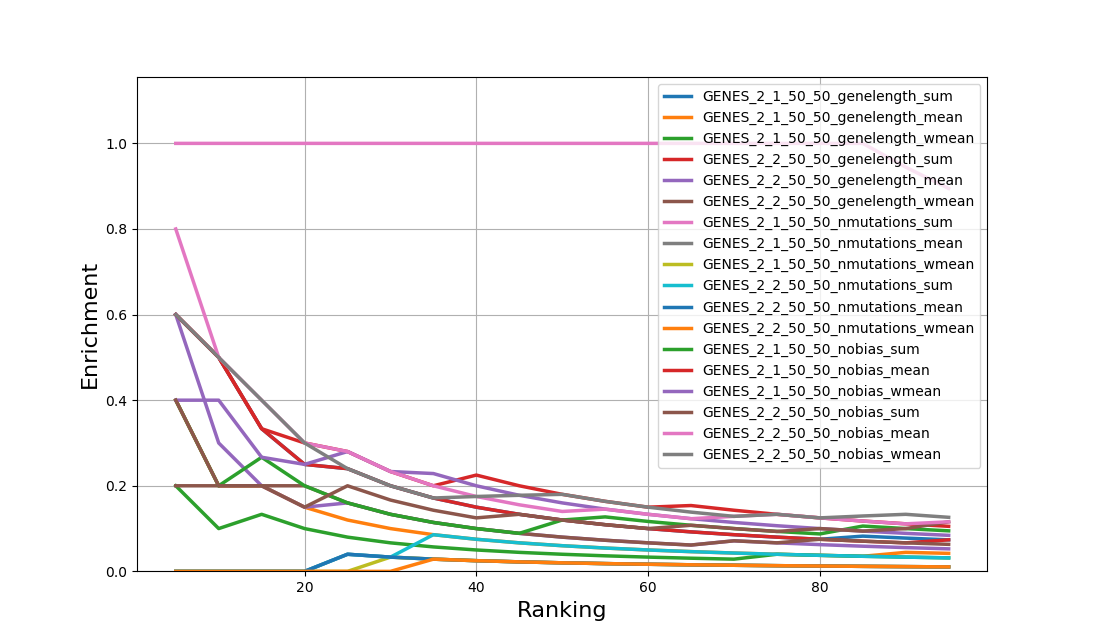

In [8]:
table = create_table(data, set_of_genes=CGC, step=5, max=100)
mpl_enrichment(table)

#### Plot nobias

In [9]:
data2 = {
        'GENES_2_1_50_50_nobias_sum': GENES_2_1_50_50_nobias_sum[1:], 
        'GENES_2_1_50_50_nobias_mean': GENES_2_1_50_50_nobias_mean[1:], 
        'GENES_2_1_50_50_nobias_wmean': GENES_2_1_50_50_nobias_wmean[1:], 
        'GENES_2_2_50_50_nobias_sum': GENES_2_2_50_50_nobias_sum[1:],
        'GENES_2_2_50_50_nobias_mean': GENES_2_2_50_50_nobias_mean[1:],
        'GENES_2_2_50_50_nobias_wmean': GENES_2_2_50_50_nobias_wmean[1:]
       }

<IPython.core.display.Javascript object>


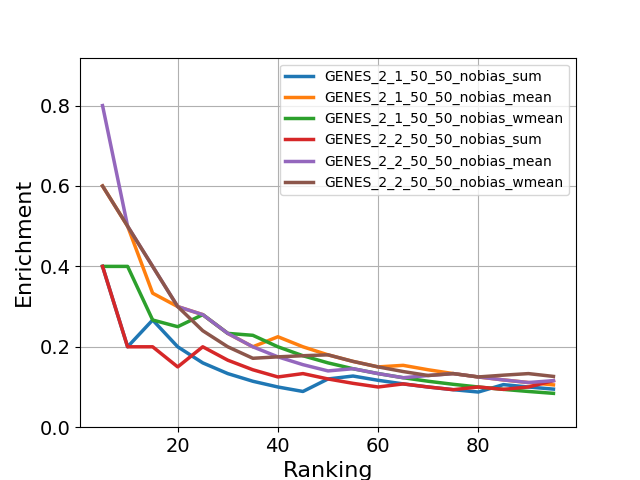

In [10]:
table = create_table(data2, set_of_genes=CGC, step=5, max=100)
mpl_enrichment(table)

#### Plot genelength

In [11]:
data3 = {'GENES_2_1_50_50_genelength_sum': GENES_2_1_50_50_genelength_sum[1:], 
        'GENES_2_1_50_50_genelength_mean': GENES_2_1_50_50_genelength_mean[1:], 
        'GENES_2_1_50_50_genelength_wmean': GENES_2_1_50_50_genelength_wmean[1:], 
        'GENES_2_2_50_50_genelength_sum': GENES_2_2_50_50_genelength_sum[1:],
        'GENES_2_2_50_50_genelength_mean': GENES_2_2_50_50_genelength_mean[1:],
        'GENES_2_2_50_50_genelength_wmean': GENES_2_2_50_50_genelength_wmean[1:]
        }

<IPython.core.display.Javascript object>


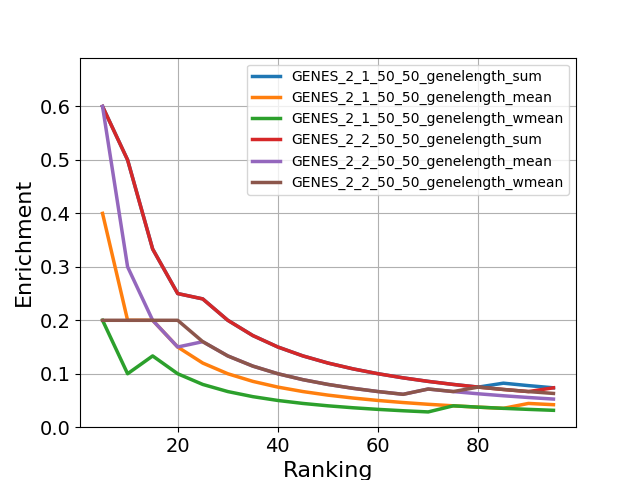

In [12]:
table = create_table(data3, set_of_genes=CGC, step=5, max=100)
mpl_enrichment(table)

#### Plot nmutations

In [13]:
data4 = {        
        'GENES_2_1_50_50_nmutations_sum': GENES_2_1_50_50_nmutations_sum[1:], 
        'GENES_2_1_50_50_nmutations_mean': GENES_2_1_50_50_nmutations_mean[1:], 
        'GENES_2_1_50_50_nmutations_wmean': GENES_2_1_50_50_nmutations_wmean[1:], 
        'GENES_2_2_50_50_nmutations_sum': GENES_2_2_50_50_nmutations_sum[1:],
        'GENES_2_2_50_50_nmutations_mean': GENES_2_2_50_50_nmutations_mean[1:],
        'GENES_2_2_50_50_nmutations_wmean': GENES_2_2_50_50_nmutations_wmean[1:]
       }

<IPython.core.display.Javascript object>


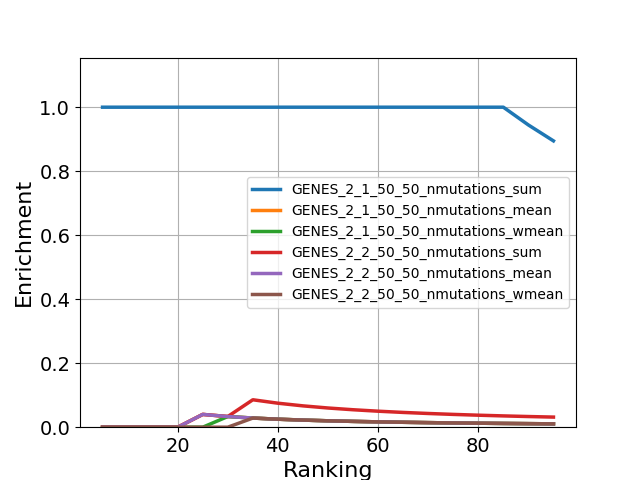

In [14]:
table = create_table(data4, set_of_genes=CGC, step=5, max=100)
mpl_enrichment(table)